## Car Price Prediction
    . Simple Linear Regression model on car price dataset.
    . Problem statement is to build a model base on secound hand cars data to predict price.

In [2]:
#import necessary Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline

In [3]:
auto=pd.read_csv("E:\AK\Ajinkya\ML\Projects\Automobile price data _Raw_.csv")
auto.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\AK47\AppData\Local\Temp\ipykernel_448\2611164520.py:1: SyntaxWarning: invalid escape sequence '\A'
  auto=pd.read_csv("E:\AK\Ajinkya\ML\Projects\Automobile price data _Raw_.csv")


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
auto.shape

(205, 26)

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Dataset contains 205 records and 26 columns

In [6]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Data Cleaning and Preprocessing
         Basic understanding of data is there is a 205 recored with 26 features.The 'price' is a target feature/variable ,most of the feature contaning '?' special symbol in data so in cleaning process we are going to replace this symbol with NaN. 

In [7]:
auto=auto.replace('?',np.NaN)

In [8]:
auto['normalized-losses']=pd.to_numeric(auto['normalized-losses'])

In [9]:
auto.isnull().sum()[auto.isnull().sum() >0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

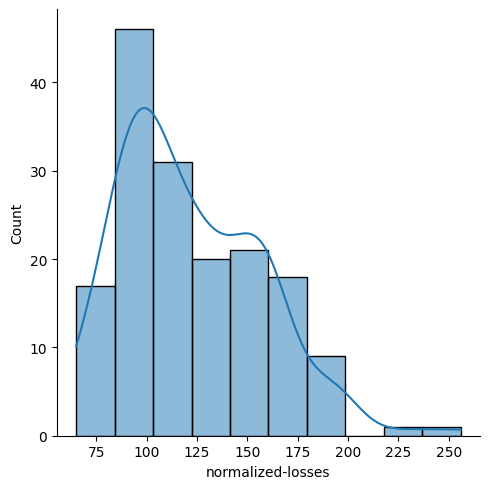

In [10]:
sns.displot(x=auto['normalized-losses'],kde=True)

In [11]:
auto['normalized-losses']=auto['normalized-losses'].fillna(auto['normalized-losses'].median())

In [12]:
auto['num-of-doors']=auto['num-of-doors'].fillna('four')

In [13]:
auto['bore']=pd.to_numeric(auto['bore'])

C:\Users\AK47\AppData\Local\Temp\ipykernel_448\411307991.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=auto['bore'])


<Axes: ylabel='Density'>

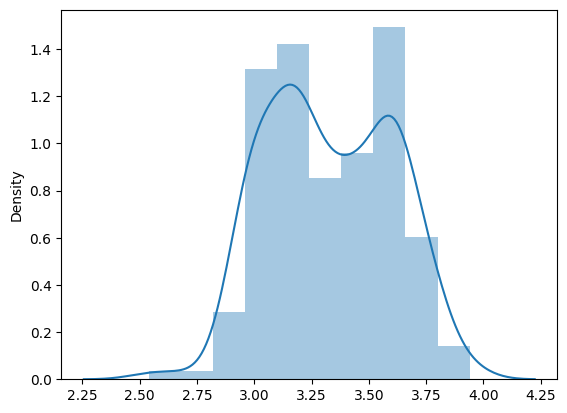

In [14]:
sns.distplot(x=auto['bore'])

In [15]:
auto['bore']=auto['bore'].fillna(auto['bore'].mean())

In [16]:
auto.stroke=pd.to_numeric(auto.stroke)

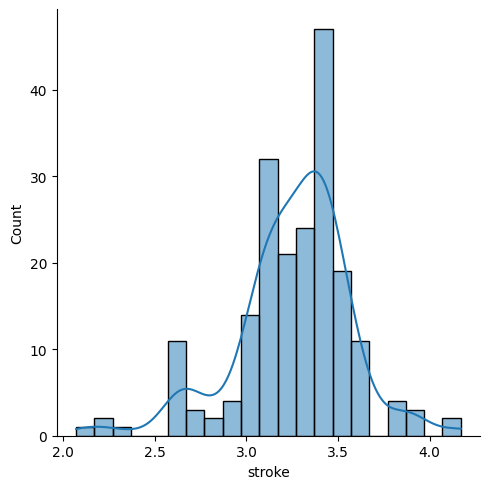

In [17]:
sns.displot(x=auto['stroke'],kde=True)

In [18]:
auto.stroke=auto.stroke.fillna(auto.stroke.mean())

In [19]:
auto['horsepower'].dtype

dtype('O')

In [20]:
auto.horsepower=pd.to_numeric(auto.horsepower)

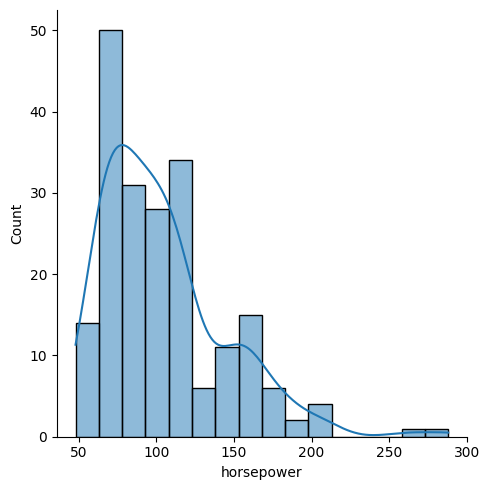

In [21]:
sns.displot(x=auto.horsepower,kde=True)

In [22]:
auto.horsepower=auto.horsepower.fillna(auto.horsepower.mean())

In [23]:
auto['peak-rpm'].dtype

dtype('O')

In [24]:
auto['peak-rpm']=pd.to_numeric(auto['peak-rpm'])

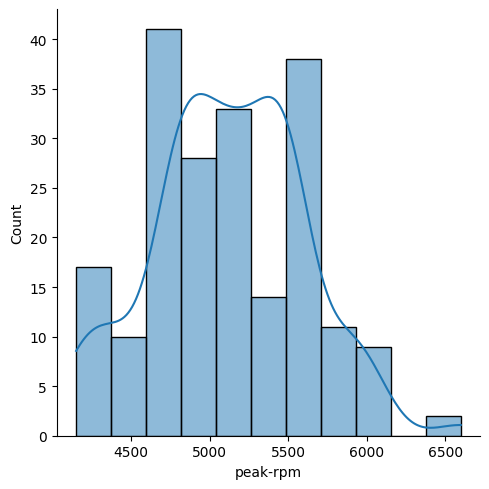

In [25]:
sns.displot(x=auto['peak-rpm'],kde=True)

In [26]:
auto['peak-rpm']=auto['peak-rpm'].fillna(auto['peak-rpm'].mean())

In [27]:
auto.price=pd.to_numeric(auto.price)

In [28]:
#we cannot fill null values in target variable ,it is better to delete NaN
auto['price'].dropna(inplace=True,axis=0)

In [29]:
auto=auto.dropna(subset=['price'])
auto.price.isnull().sum()

0

# Data Visualizatiom

In [30]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<Axes: xlabel='price', ylabel='Count'>

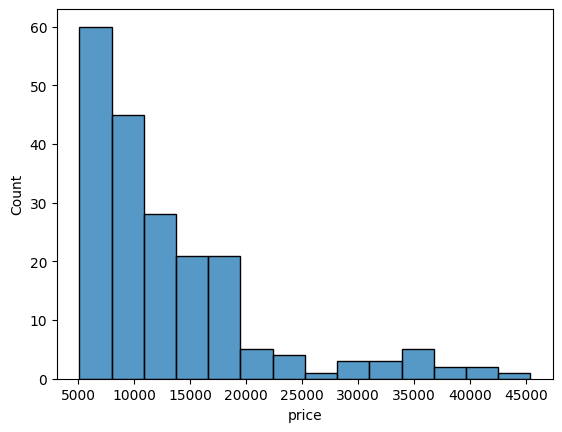

In [31]:

sns.histplot(data=auto,x='price')

<Axes: xlabel='city-mpg', ylabel='highway-mpg'>

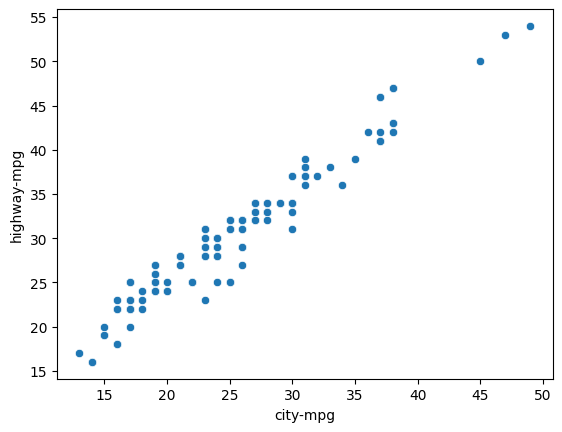

In [32]:
sns.scatterplot(x='city-mpg',y='highway-mpg',data=auto)

In [33]:
auto.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
le=LabelEncoder()

In [36]:
#convert object into numeric to perform model training
auto[auto.select_dtypes(include='object').columns]=auto[auto.select_dtypes(include='object').columns].apply(le.fit_transform)

In [37]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<Axes: >

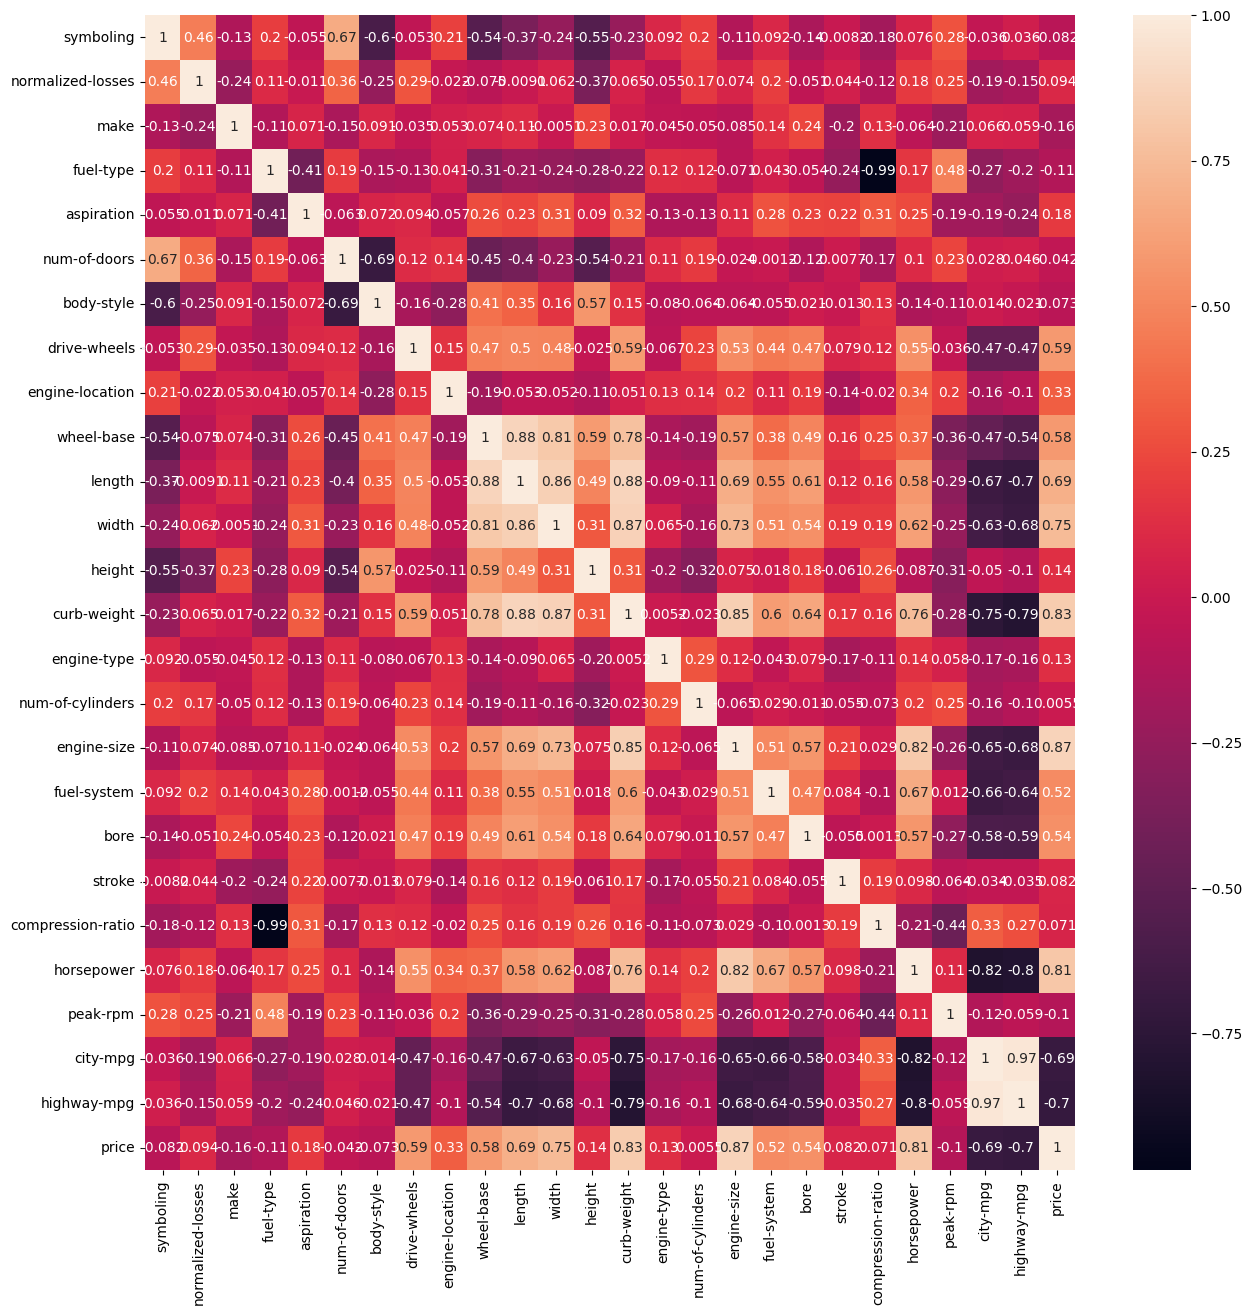

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(auto.corr(),annot=True)

In [113]:
df1=auto

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
train_auto,test_auto=train_test_split(auto,test_size=0.2)
print(f'Train Size {train_auto.shape} and Test Size {test_auto.shape}')

Train Size (160, 26) and Test Size (41, 26)


In [116]:
x_train_auto=train_auto.iloc[:,0:-1]
y_train_auto=train_auto.iloc[:,-1]

In [117]:
x_test_auto=test_auto.iloc[:,0:-1]
y_test_auto=test_auto.iloc[:,-1]

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
leg_auto=LinearRegression()

## Fit model using Linear Regression

In [120]:
leg_auto.fit(x_train_auto,y_train_auto)

LinearRegression()

In [121]:
pre_auto=leg_auto.predict(x_test_auto)

In [122]:
err_test=y_test_auto-pre_auto

## Evaluatation of Model

In [123]:
r2score=leg_auto.score(x_train_auto,y_train_auto)
print("R Square:",r2score*100)

R Square: 89.68177199510635


In [124]:
x_train_auto.shape

(160, 25)

In [125]:
N=x_train_auto.shape[0]
K=x_train_auto.shape[1]

In [126]:
adj_r2score=1-(1-r2score)*(N-1)/(N-K-1)
adj_r2score*100

87.75672945687991

In [127]:
mse=np.mean(np.square(err_test))
mse

8839180.517490784

In [128]:
rmse=np.sqrt(mse)
rmse

2973.0759353724525

In [129]:
mape=np.mean(np.abs(err_test*100/y_test_auto))
mape

18.837226542721883

<Axes: xlabel='price', ylabel='Count'>

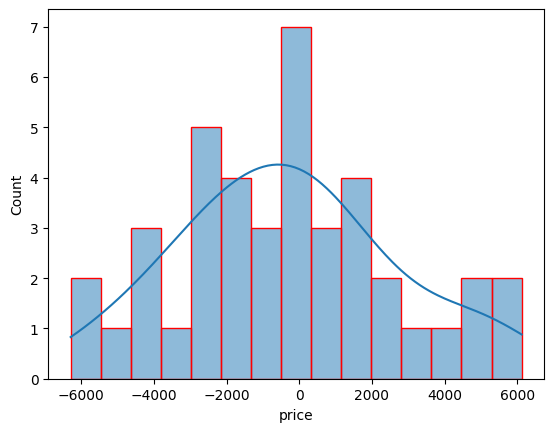

In [130]:
sns.histplot(err_test,bins=15,edgecolor='r',kde=True)

In [131]:
pred_actual_df=pd.DataFrame()
pred_actual_df['Actual']=y_test_auto
pred_actual_df['Predicted']=pre_auto

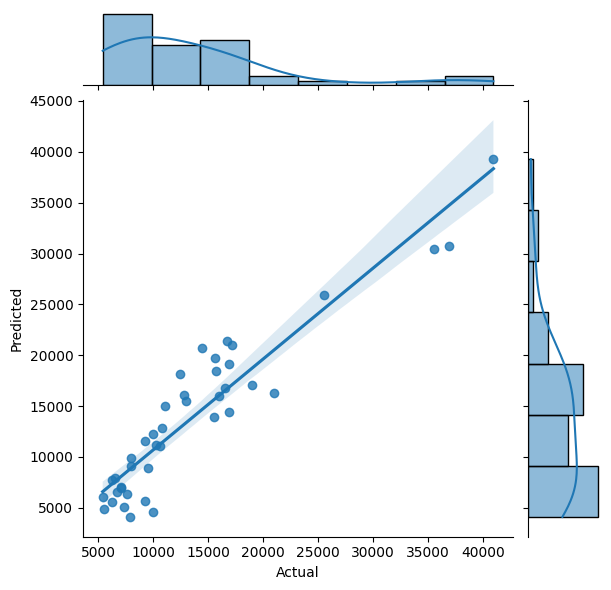

In [132]:
sns.jointplot(x='Actual',y='Predicted',data=pred_actual_df,kind='reg')

### Outlier Treatment

In [111]:
def remove_outlier(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if(x < mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]
    print(df1.shape)
    print("Number of outliers removed-----",df.shape[0]-df1.shape[0])

In [112]:
remove_outlier(auto,'price',3)

(198, 26)
Number of outliers removed----- 3
